# Nick Juliano
# Computational Physics | Homework 09

## Problem:

Highly nonlinear oscillator: 

Recall the numerical solution for oscillations of a spring with power $P = 12$ (use $F=-0.01 y(0)^{11}$). Decompose the solution into a Fourier series and determine the number of higher harmonics that contribute at least 10% of the total power; for example, determine the n for which $\lvert{\frac{b_n}{b_1}}\rvert < 0.1$. Check that resuming the components reproduces the signal.
(Landau 289)

## Solution:

This solution is admittedly brief due the need to prioritize other academic obligations at this point in the semester.

In my undergraduate studies I used Discrete Fourier Transform to analyze and reproduce audio signals in MATLAB. I have included that (unmodified) code in my "Homework" folder here as a fun demonstration of "real-world" applications of DFT, although potential users would need to modify the code to reference a different .wav file. 

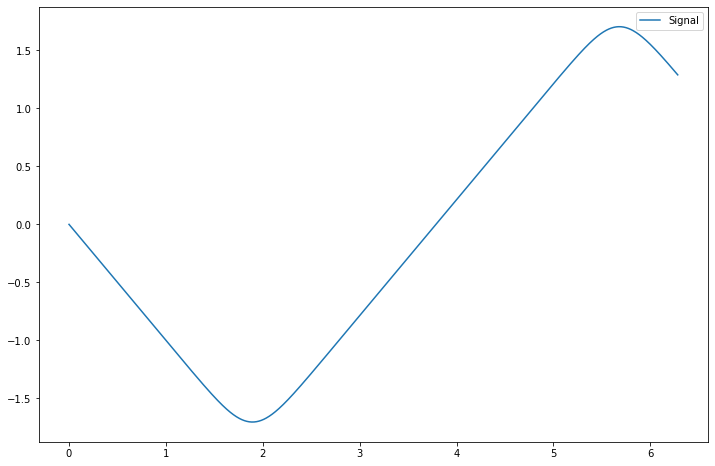

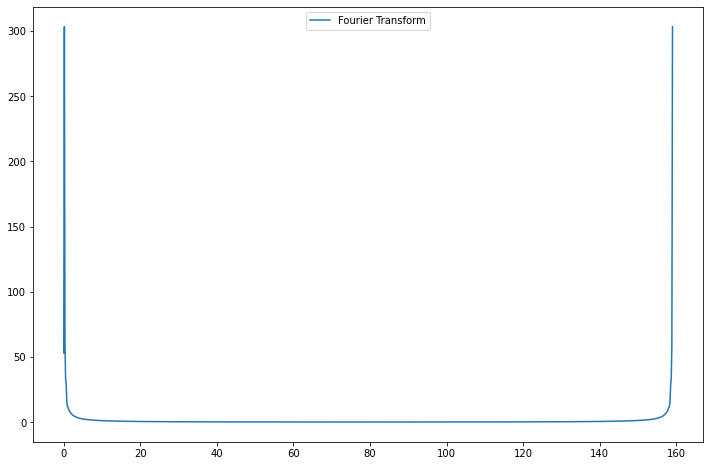

the number of higher harmonics that contribute at least 10% of the total power is  999
that percentage is  0.17717902757188894
and the harmonic is 158.99578814880343


In [73]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np

#   Initialization
a = 0.
b = 6.2832
n = 1000                                         
ydumb = np.zeros((2), float);    y = np.zeros((2), float)
fReturn = np.zeros((2), float);  k1 = np.zeros((2), float)
k2 = np.zeros((2), float);       k3 = np.zeros((2), float) 
k4 = np.zeros((2), float)
y[0] = 0.;   y[1] = -1.
t = a;       h = (b-a)/n;
xp=np.array([0.0])
yp=np.array([y[0]])

def f( t, y):                   # Force function 
    fReturn[0] = y[1]           # dvdt                                          
    fReturn[1] = -0.01*y[0]**11 # F=-0.01*y[0]**11
    return fReturn

def rk4(t,h,n):                 
    k1 = [0]*(n)
    k2 = [0]*(n)
    k3 = [0]*(n)
    k4 = [0]*(n)
    fR = [0]*(n)
    ydumb = [0]*(n)
    fR = f(t, y)                                            # Returns RHS's  
    for i in range(0, n):
        k1[i] = h*fR[i]                             
    for i in range(0, n):
        ydumb[i] = y[i] + k1[i]/2. 
    k2 = h*f(t+h/2., ydumb) 
    for i in range(0, n):
        ydumb[i] = y[i] + k2[i]/2. 
    k3 = h*f(t+h/2., ydumb)
    for i in range(0, n):
        ydumb[i] = y[i] + k3[i] 
    k4 = h*f(t+h, ydumb) 
    for i in range(0, 2):
        y[i] = y[i] + (k1[i] + 2.*(k2[i] + k3[i]) + k4[i])/6.
    return y    

while (t < b):                                              # Time loop
    if ((t + h) > b):
        h = b - t                                           # Last step
    y = rk4(t,h,2)
    t = t + h
    xp=np.append(xp, t)
    yp=np.append(yp,y[0])

        
pi     = np.pi
N      = len(yp)-1;                  
Np     = N                           
signal = yp     
twopi  = 2.*pi;       
sq2pi  = 1./np.sqrt(twopi);         
h      = twopi/N
dftz   = np.zeros( (Np), complex )                  # Complex elements
xa     = np.zeros( (N+1), float )   
nplot  = np.zeros( N, float )   
fplot  = np.zeros( N, float ) 
step = 2.*pi/N

def f(signal):                                                  # Signal
    step = twopi/N;        
    x = 0. 
    for i in range(0, N+1):
        signal[i] = signal[i]
        xa[i] = x                      # Plot
        x += step
        

def fourier(dftz):                                              # DFT
    for n in range(0, Np):              
      zsum = complex(0.0, 0.0)                
      for  k in range(0, N):                              
          zexpo = complex(0, twopi*k*n/N)           # Complex exponent
          zsum += signal[k]*np.exp(-zexpo)           
      dftz[n] = zsum * sq2pi      
      nplot[n] = n/N/step
      fplot[n] = np.sqrt(dftz[n].imag*dftz[n].imag+dftz[n].real*dftz[n].real)

    
f(signal);       
fourier(dftz)              # Call signal, transform
plt.figure(figsize=[12, 8])
plt.plot(xa,signal, label="Signal")
plt.legend()
plt.show()

plt.figure(figsize=[12, 8])
plt.plot(nplot,fplot, label = "Fourier Transform")
plt.legend()
plt.show()

b_1 = np.sum(fplot)
for n in range (0, Np):
    n = Np-n
    #print(n)
    if np.sum(fplot[n:Np])/b_1 > 0.1:
        print('the number of higher harmonics that contribute at least 10% of the total power is ', n)
        print('that percentage is ', np.sum(fplot[n:Np])/b_1)
        print('and the harmonic is', n/N/step)
        break